In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditscoreclassification/get_dummies.py
/kaggle/input/creditscoreclassification/credit_score_ord_enc.pkl
/kaggle/input/creditscoreclassification/credit_score_dummy_enc.pkl
/kaggle/input/creditscoreclassification/credit_score_xgb_model.json
/kaggle/input/creditscoreclassification/credit_score_le.pkl
/kaggle/input/creditscoreclassification/train.csv
/kaggle/input/creditscoreclassification/test.csv


In [11]:
# Load the CSV file into a DataFrame
df = pd.read_csv("/kaggle/input/creditscoreclassification/train.csv")

In [12]:

# Now you can use the head() method
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [14]:
# Step 1: Load the datasets
train_df = pd.read_csv("/kaggle/input/creditscoreclassification/train.csv")
test_df = pd.read_csv("/kaggle/input/creditscoreclassification/test.csv")



In [15]:

# Step 2: Feature Selection
features = [
    'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
    'Num_Bank_Accounts', 'Credit_Mix', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Payment_of_Min_Amount', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
]


In [16]:

# Separate features and target variable
X_train = train_df[features]
y_train = train_df['Credit_Score'].map({'Good': 2, 'Average': 1, 'Poor': 0})


In [17]:

# Handle missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Align y_train with the cleaned X_train
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}  # Ensure the dictionary is named consistently
for col in ['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']:
    label_encoders[col] = LabelEncoder()  # Correctly spell LabelEncoder
    X_train[col] = label_encoders[col].fit_transform(X_train[col])


In [25]:
from sklearn.preprocessing import StandardScaler

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=features)


In [26]:

# Prepare the test data with the same preprocessing steps
X_test = test_df[features]
for col in ['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount']:
    X_test[col] = label_encoders[col].transform(X_test[col])
X_test = scaler.transform(X_test)

/tmp/ipykernel_33/262627630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = label_encoders[col].transform(X_test[col])
/tmp/ipykernel_33/262627630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = label_encoders[col].transform(X_test[col])
/tmp/ipykernel_33/262627630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [30]:


# Get the best model
best_log_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.01, 'solver': 'liblinear'}


In [32]:


# Predict on training data
y_train_pred = best_log_reg.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.8246273437833682


In [33]:

# Predict on test data
y_test_pred = best_log_reg.predict(X_test)

# Save predictions
output_df = pd.DataFrame({'ID': test_df['ID'], 'Predicted_Credit_Score': y_test_pred})
output_df['Predicted_Credit_Score'] = output_df['Predicted_Credit_Score'].map({2: 'Good', 1: 'Average', 0: 'Poor'})
output_df.to_csv('credit_score_predictions.csv', index=False)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
# Compute metrics for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)
print("Training Classification Report:\n", class_report_train)

Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.82      0.85     28998
         2.0       0.74      0.83      0.78     17828

    accuracy                           0.82     46826
   macro avg       0.81      0.83      0.82     46826
weighted avg       0.83      0.82      0.83     46826



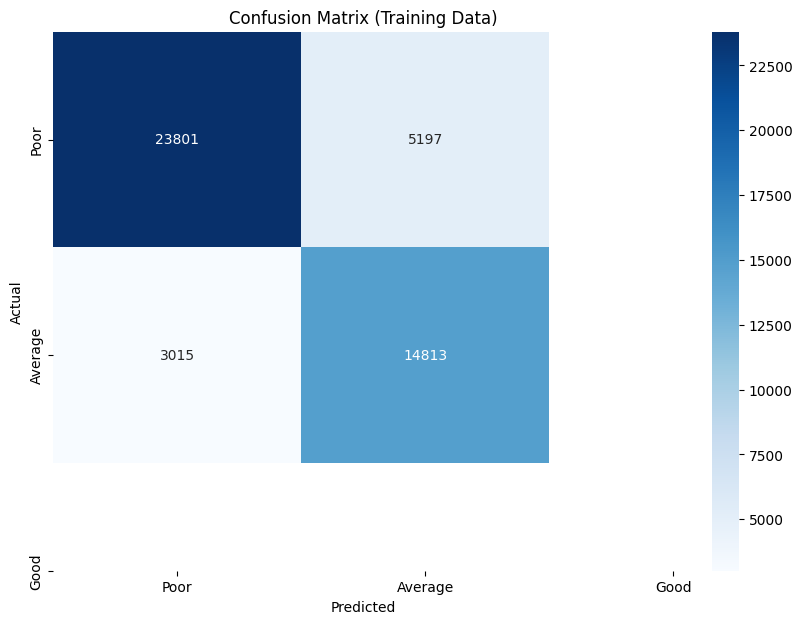

In [35]:
# Plot confusion matrix for training data
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Poor', 'Average', 'Good'], yticklabels=['Poor', 'Average', 'Good'])
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:

# For ROC curve and Precision-Recall curve, we need probability scores
y_train_prob = best_log_reg.predict_proba(X_train)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_train, y_train_prob, pos_label=2)
roc_auc = auc(fpr, tpr)

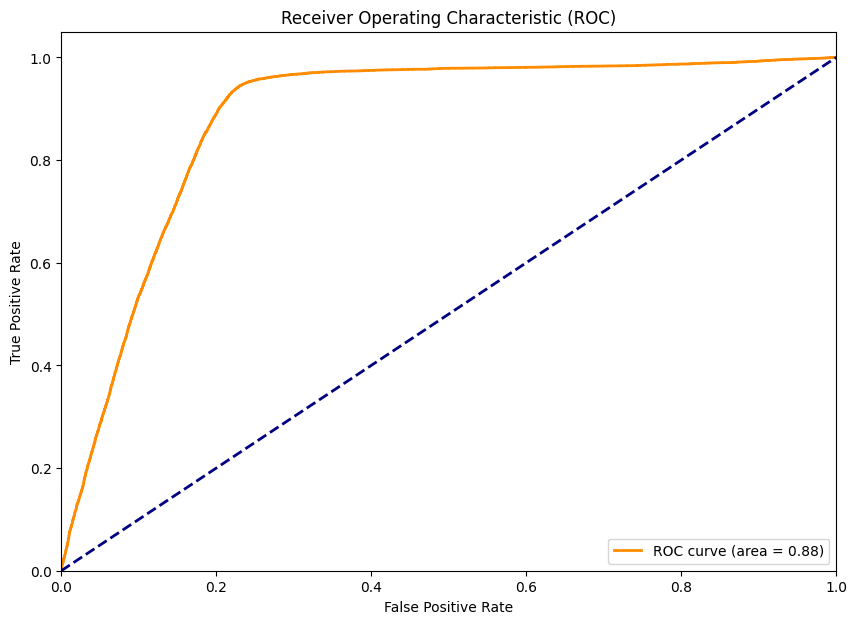

In [37]:
# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


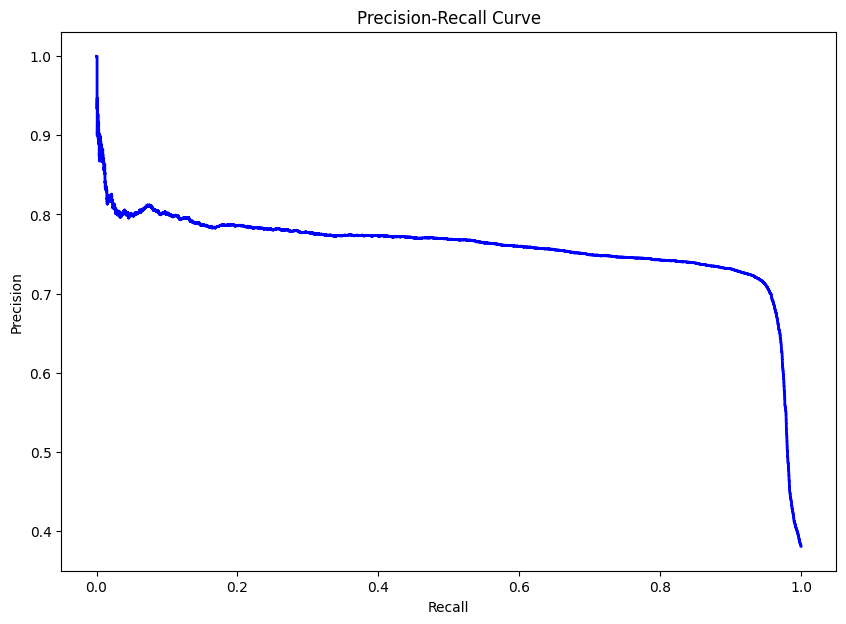

In [38]:

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob, pos_label=2)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score

# Compute cross-validation scores
cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.81998719 0.82541377 0.82082221 0.82156967 0.83310198]
Mean CV Accuracy: 0.8241789645021314


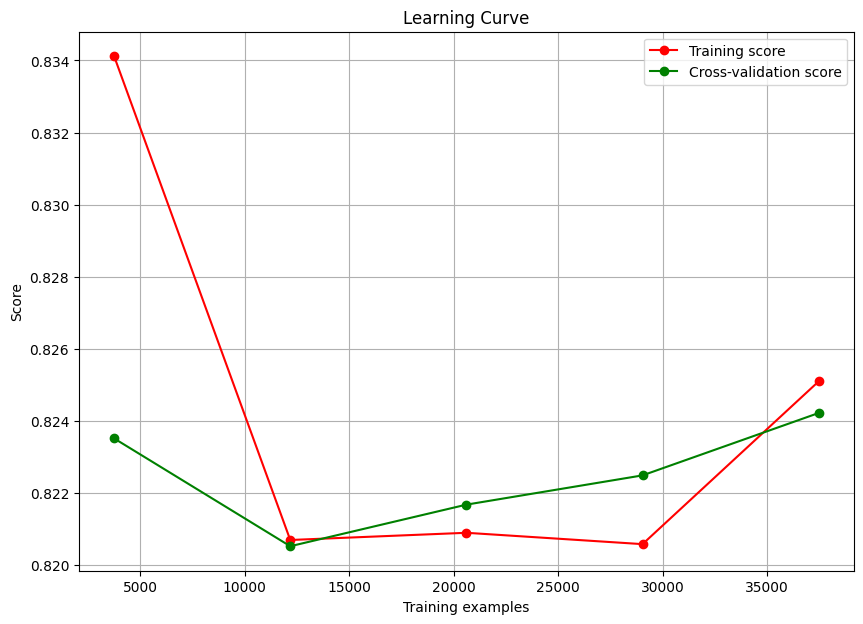

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


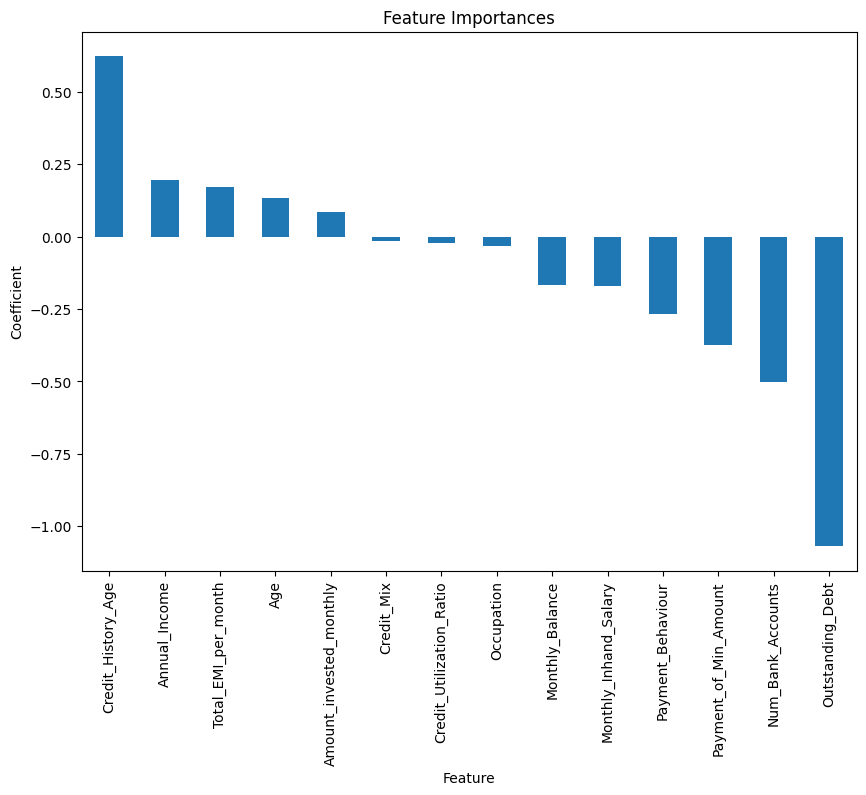

In [42]:
# Get feature importances
feature_importances = pd.Series(best_log_reg.coef_[0], index=features)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 7))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()


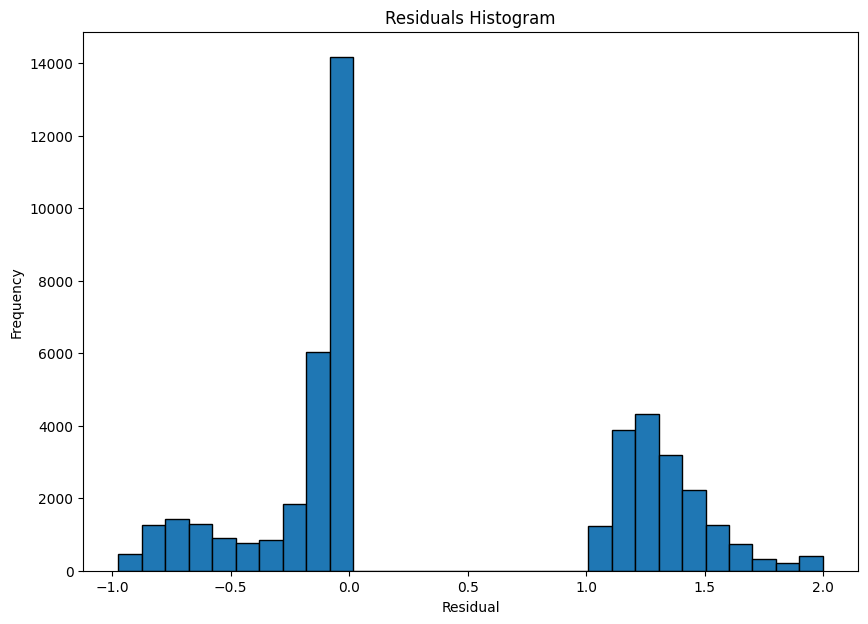

In [43]:
residuals = y_train - best_log_reg.predict_proba(X_train)[:, 1]

plt.figure(figsize=(10, 7))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [45]:
from joblib import dump

# Save the trained model to a file
dump(best_log_reg, "creditscore.joblib")


['creditscore.joblib']

In [46]:
import pickle

# Save the trained model to a file
with open("creditscore.pkl", "wb") as file:
    pickle.dump(best_log_reg, file)
